# Aprendizaje No Supervisado (teoría)

### Paradigmas ML:

- **Supervisado (conocemos las etiquetas)**
    - Clasificaicón
    - Regresión

- **No Supervisado (no necesito conocer las etiquetas)**
    - Clustering
    - Reducción de dimensionalidad

***
	
	— Para qué puede ser útil un modelo no supervisado de **CLUSTERING? Te ayuda a encontrar patrones**
		- Para sistemas de recomendación (para datos sin historial)
		- Marketing Enfacado: segmentar datos.
		- Imputación de valores faltantes.

	— Para qué puede ser útil un modelo no supervisado de REDUCCION de DIMENSIONALIDAD?
		- Reducción de columnas para evitar overfit.
			- Descumbrimiento de estructuras
			- Comprensión de los datos.

***

### Clustering pretende encontrar Clusters, agrupación de elementos.

Algoritmo1: K-Means:

- **“K”:** es la cantidad de grupos que va a en encontrar.

- **“Means”:** es la forma en que funciona el algoritmo:, esto es: moviéndose hacia las medias.

- **Centroides:** puntos aleatorios en función de las K.

- Lo que el algoritmo hace es: encontrar las posiciones de los centroides para lo que las distancias de sus puntos sean las menores posibles.

    - Calcula las distancia de los datos respecto de los centroides.
    
    - Ubica el centroide más cercano y le da la etiqueta del centroide más cercano.
    
    - Creados los grupos de etiquetas, se crean nuevos centroides ubicados en el centro de cada nuevo grupo (actualiza los centros).
    
    - El proceso se repite hasta crear “k” grupos en donde las distancias entre los datos son las menores….
    
    - Llega un punto en el que los centroides ya no se mueven, tantos centroides como “k”, y cada centroide tiene coordenada (x,y). Un centroide final es el punto que mejor define cada cluster. La interpretación del centroide dependerá de de las variables en el eje X e Y.
    
***
    
### Reducción de dimensionalidad

- buscamos reducir la cantidad de features de un dataset, pero reteniendo la mayor cantidad de "información" posible.

sirve para: 
    
      - reducir varianza: reducir el input de un modelo de regresión o clasificación.
      
      - compresión de archivos
      
      - visualización
      
      - detectar features relevantes
      
***

### DBSCAN

- Objetivo: identificar un **número arbitrario de clusters.** **Los clusters estarán definidos por densisdad de puntos.** Puede haber puntos que no pertenecan a ningún cluster (noise/outliers).

- Recorre todo el dataset y va identificando las zonas de puntos densamente pobladasc omo pertenecientes a un mismo cluster.

- Recordemos que con K-means las fronteras siempre serán líneas rectas, por lo que no puedo separar datos con formas no linealmente separables.DBSCAN puede.

- Sus parámetros más importantes son:
    
    - Epsilon: ruido: a qué distancia alrededor de cad apunto va a buscar los vecinos. Epsilon se calcula en función de los datos y las escalas.
    
    - Minpts: cantidad de puntos a buscar en el radio definido.


--- **¿Cómo funciona?**
    
    - Mientras K-means busca la distancia a los centroides, DBSCAN mira distancias entre un punto y todos los demás (es más pesado de procesar).
    
    - Selecciona puntos aleatoriamente. 
    
    - Mide la distanvia de epsilon, y busca la cantidad de pintos definida. 
    
    - Si no cumple la condición del número de puntos señalados, marca el/los puntos como "Border" (no lo vuelve a recorrer.
    
    - Sigue proopagándose, cuando llega a un dato con el númro de Minpts señadado, lo marca como "Core"; ejemplo: cluster cero. 
    
    - Sigue hacia los puntos que, satisfacen l el "Minpts" que rodean el punto "Core", y como este este esá marcado como cluster cero, éstos también se etiquetan de esa forma.
   
   - Continúa así hasta que llegue a un "border", el cual clasifica como cluster cero también.
   
   - Si encuentra un punto que no tiene ningún punto en su radio, lo marca como error, no pertenece a ninguna de las clases. 
   
   - De esta forma termina la propagación de la clase cero. 
   
   - Luego hace lo mismo desde otro punto de partida aleatorio. Lo hace para todos los puntos del dataset.

***

### Comparación entre K-Means y DBSCAN

**Kmeans**

-- Ventajas

- rápido

- no tiene parámetros, solo "k"

- es fácil asignar nuevas instancias, pues solo tiene en cuanta los centroides.


-- Desventajas

- sensible a outliers.

- solo funciona ver con clusters bien separados, separables linealmente.

**DBSCAN**

-- Ventajas

- No hay que elegir el número de clusters.

- Detecta cualquier forma de clusters.

- Detecta automáticamente los datos outliers.


-- Desventajas

- Hay que elegir bien los parámetros (muy sensible a epsilon y Minpts)

- No anda bien si hay clusters de diferentes densidades ()

- Es computacionalmente más costoso.


# Clustering Notebook

## 1. K-means (trabaja con distancias -no variables categóricas-) y DBSCAN (trabaja con categóricas)

En esta primera parte, vamos a trabajar con los métodos K-means y DBSCAN.

** Importante: este algoritmo es muy sensible al escalamiento de variables. Lo más recomendable es escalar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

Para empezar, vamos a generarnos una serie de datasets sintéticos con las funciones que ya vienen incorporadas en Scikit-learn. Notemos que estos datos vienen con una etiqueta asociada donde nos indica a qué cluster pertenecen. La idea será utilizar los métodos de clustering estudiados para poder identificar los clusters sin conocer esta etiqueta.

In [3]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

Grafiquemos los datasets para ver las diferencias entre cada uno.

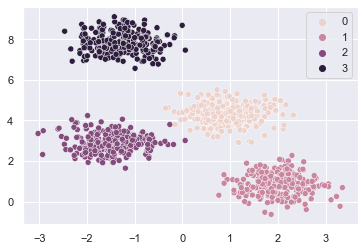

In [4]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

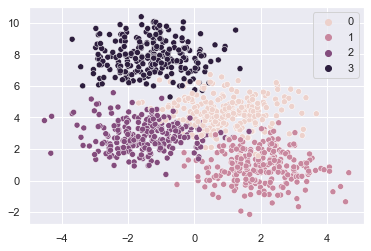

In [5]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

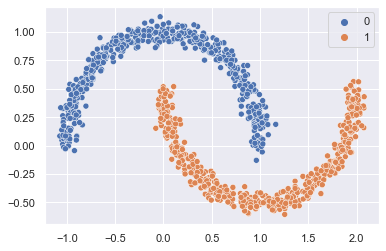

In [6]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

### 1.1 K-means

Scikit-Learn tiene una implementación de K-means.

1. Lee la documentación.

2. Define los 3 modelos para los distintos datasets.

In [7]:
from sklearn.cluster import KMeans

# Especificamos el numero adecuado de clusters en cada caso
kmeans_1 = KMeans(n_clusters=4, random_state=0)
kmeans_2 = KMeans(n_clusters=4, random_state=0)
kmeans_3 = KMeans(n_clusters=2, random_state=0)

3. Entrena los modelos con los datos, recuerda que NO hay que pasarles las etiquetas, solo los atributos.

In [8]:
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

KMeans(n_clusters=2, random_state=0)

Luego de entrenar los modelos, podemos consultar las etiquetas que se le asignó a cada instancia y el lugar de los centroides.

In [9]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(1000,)


In [10]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[-1.27283855  7.84651464]
 [-1.49807428  2.90164881]
 [ 2.01942692  0.87474842]
 [ 0.92917513  4.29023124]]


In [13]:
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_

4.  Ploteamos los resultados para todos los datasets. ¿Les parece que la separación fue adecuada?

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


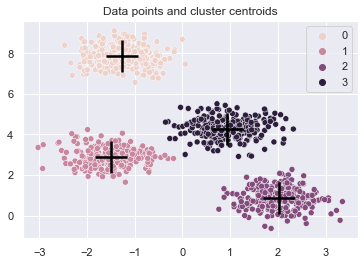

In [18]:
sns.scatterplot(X1[:, 0], X1[:, -1], hue = etiquetas_1) 
# "hue": Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

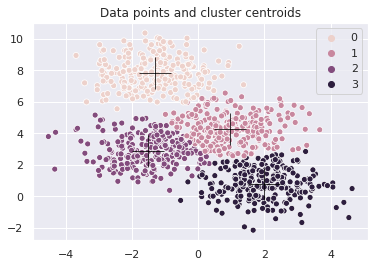

In [17]:
sns.scatterplot(X2[:, 0], X2[:, -1], hue = etiquetas_2)
sns.scatterplot(centros_2[:, 0], centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

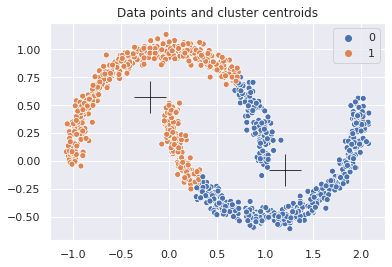

In [18]:
sns.scatterplot(X3[:, 0], X3[:, -1], hue = etiquetas_3)
sns.scatterplot(centros_3[:, 0], centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

Para ver el acuerdo que hubo entre los clusters determinados por el algoritmos de clustering y los generados originalmente, podemos usar una matriz de confusión. Notemos que no sabemos si los nombres de los clusters se corresponden entre sí, el cluster 0 en los datos originales podría ser el cluster 1 en los calculados con k-means.

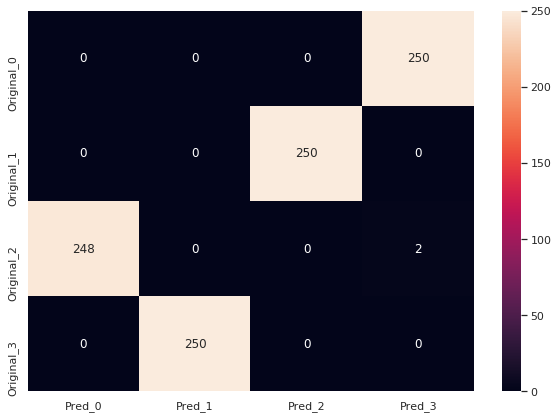

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1, etiquetas_1)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

5. Repite el ploteo de la matriz de confusión para los otros datasets. ¿Se te ocurre alguna manera de cuantificar el acuerdo entre ambos sets de etiquetas (el original y el obtenido por clustering)?

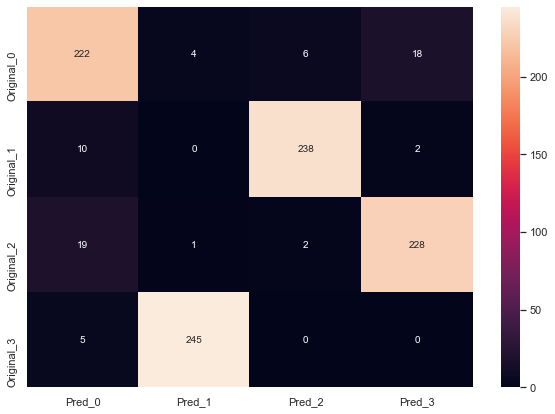

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2, etiquetas_2)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2','Original_3']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

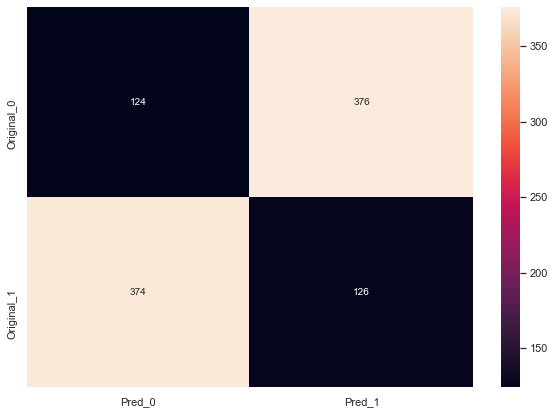

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y3, etiquetas_3)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1']],
                  columns = [i for i in ['Pred_0','Pred_1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

6. Prueba qué sucede si no elige correctamente el número de clusters. ¿Se le ocurre cómo puede usar las matrices de confusión para darse cuenta que no eligió correctamente ese número?

### 1.2 DBSCAN

1. Lee la documentación.
2. Define los 3 modelos para los distintos datasets.

In [20]:
from sklearn.cluster import DBSCAN

# En este paso tenemos que definir el epsilon y en min_samples, los parametros del método.
db_1 = DBSCAN(eps=0.3, min_samples=10)
db_2 = DBSCAN(eps=0.4, min_samples=12)
db_3 = DBSCAN(eps=0.2, min_samples=10)

3. Entrena los modelos con los distintos datasets

In [21]:
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

Podemos consultar las etiquetas asignadas luego de entrenar en la variable `labels_`. Notemos que cuando el label sea igual a '-1' quiere decir que esa instancia fue considerada ruido. 

4. Teniendo en cuenta esto, podemos obtener el numero de clusters y el numero de instancias consideradas ruido de la siguiente forma (solo lo hacemos para el primer dataset):

In [22]:
# Consultamos las etiquetas
labels_1 = db_1.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

In [23]:
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)

Estimated number of clusters: 4
Estimated number of noise points: 64


Les damos ya definida una función que plotea los resultados de manera tal que colorea con distintos colores los distintos clusters, en gris los datos que se consideran Noise y ademas en tamaño mas grande las instancias que son CORES. No hace falta que cambien nada de esta función.

In [24]:
# Funcion para plotear, NO CAMBIAR NADA
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

5. Ploteamos el resultado para el primer caso. ¿Te parece adecuado el resultado? Prueba qué pasa si modifica los parámetros de epsilon y min_dist.

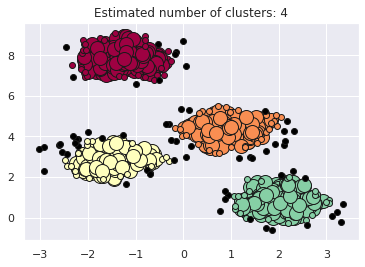

In [25]:
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

6. Repetimos el paso 5 para los otros 2 datasets, nota que debe calcular `labels_2`, `core_samples_mask_2`, etc... Recomendación: vuelva a copiar todo el codigo en las siguientes celdas en lugar de modificar el que ya tiene escrito para el dataset 1. 

Estimated number of clusters: 4
Estimated number of noise points: 64


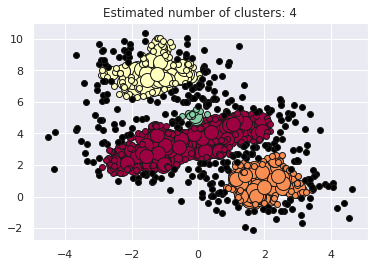

In [26]:
# Consultamos las etiquetas
labels_2 = db_2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
n_noise_2 = list(labels_2).count(-1)

print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_2 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_2[db_2.core_sample_indices_] = True

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

Estimated number of clusters: 2
Estimated number of noise points: 0


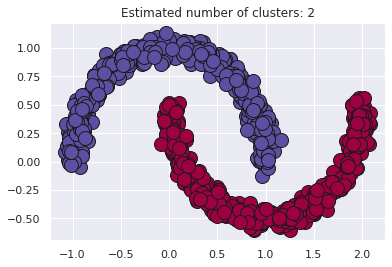

In [27]:
# Consultamos las etiquetas
labels_3 = db_3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

print('Estimated number of clusters: %d' % n_clusters_3)
print('Estimated number of noise points: %d' % n_noise_3)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_3 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_3[db_2.core_sample_indices_] = True

plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)

7. Ajustar los parametros `epsilon` y `min_dist` para lograr un resultado lo más parecido al dataset original posible.

8. A partir de los resultados obtenidos, reflexione sobre las fortalezas y debilidades de cada uno de los métodos.


## 2. ¡A probar con un dataset!

Elige un dataset que te interese y aplica las técnicas vistas. ¿Qué esperas obtener?¿Qué obtienes? Por ejemplo, puedes aplicarlo sobre el dataset Iris (¿qué ocurre si usas `n_clusters=2` y `n_clusters=3` en k-means?), o el dataset del proyecto.